In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.float_format', lambda x: '%.2f' % x)
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# K-Means clustering

In [2]:
df = pd.read_excel('/content/drive/MyDrive/data_cacao_project/Datos_estructurados_Baraya/merged_full_V2.xlsx')

In [3]:
df.head()

,Unnamed: 0,id,viven_en_el_predio_de_caco,chum_2,chum_3,chum_5,cfis_1,cfis_2,cfis_3,cfis_4,...,A,AR,L,Textura,Dr,Da,n,NDRE_Promedio,NDVI_Promedio,TEMP_Promedio
0,0,bar1,si,alto_,mano_de_obra_medianamente_calif,no,escriturado_,media,trocha,no,...,19.30,26.40,54.30,FL,2.30,1.41,38.73,0.41,0.85,31.80
1,1,bar2,no,alto_,mano_de_obra_medianamente_calif,no,escriturado_,media,trocha,no,...,38.67,34.50,26.83,FAr,2.39,1.25,47.70,0.42,0.86,28.97
2,2,bar3,no,medio,mano_de_obra_altamente_califica,no,carta_venta,media,trocha,no,...,43.70,32.10,24.20,FAr,2.36,1.27,46.19,0.16,0.50,33.45
3,3,bar4,no,bajo,mano_de_obra_medianamente_calif,no,no_reporta_ninguna_forma_legal_,alta,placa_huella_,no,...,29.50,40.20,30.30,Ar,2.38,1.15,51.68,0.18,0.55,35.59
4,4,bar5,no,alto_,mano_de_obra_medianamente_calif,no,no_reporta_ninguna_forma_legal_,media,trocha,no,...,47.60,30.10,22.30,FAr,2.46,1.33,45.93,0.24,0.47,32.44


In [4]:
df.shape

(103, 86)

In [5]:
df.isnull().sum().sum()

np.int64(0)

In [6]:
df.head()

,Unnamed: 0,id,viven_en_el_predio_de_caco,chum_2,chum_3,chum_5,cfis_1,cfis_2,cfis_3,cfis_4,...,A,AR,L,Textura,Dr,Da,n,NDRE_Promedio,NDVI_Promedio,TEMP_Promedio
0,0,bar1,si,alto_,mano_de_obra_medianamente_calif,no,escriturado_,media,trocha,no,...,19.30,26.40,54.30,FL,2.30,1.41,38.73,0.41,0.85,31.80
1,1,bar2,no,alto_,mano_de_obra_medianamente_calif,no,escriturado_,media,trocha,no,...,38.67,34.50,26.83,FAr,2.39,1.25,47.70,0.42,0.86,28.97
2,2,bar3,no,medio,mano_de_obra_altamente_califica,no,carta_venta,media,trocha,no,...,43.70,32.10,24.20,FAr,2.36,1.27,46.19,0.16,0.50,33.45
3,3,bar4,no,bajo,mano_de_obra_medianamente_calif,no,no_reporta_ninguna_forma_legal_,alta,placa_huella_,no,...,29.50,40.20,30.30,Ar,2.38,1.15,51.68,0.18,0.55,35.59
4,4,bar5,no,alto_,mano_de_obra_medianamente_calif,no,no_reporta_ninguna_forma_legal_,media,trocha,no,...,47.60,30.10,22.30,FAr,2.46,1.33,45.93,0.24,0.47,32.44


In [7]:
df_2 = df.drop(columns='id', axis=1)

In [8]:
df_2.head()

,Unnamed: 0,viven_en_el_predio_de_caco,chum_2,chum_3,chum_5,cfis_1,cfis_2,cfis_3,cfis_4,cfis_5,...,A,AR,L,Textura,Dr,Da,n,NDRE_Promedio,NDVI_Promedio,TEMP_Promedio
0,0,si,alto_,mano_de_obra_medianamente_calif,no,escriturado_,media,trocha,no,no,...,19.30,26.40,54.30,FL,2.30,1.41,38.73,0.41,0.85,31.80
1,1,no,alto_,mano_de_obra_medianamente_calif,no,escriturado_,media,trocha,no,no,...,38.67,34.50,26.83,FAr,2.39,1.25,47.70,0.42,0.86,28.97
2,2,no,medio,mano_de_obra_altamente_califica,no,carta_venta,media,trocha,no,no,...,43.70,32.10,24.20,FAr,2.36,1.27,46.19,0.16,0.50,33.45
3,3,no,bajo,mano_de_obra_medianamente_calif,no,no_reporta_ninguna_forma_legal_,alta,placa_huella_,no,no,...,29.50,40.20,30.30,Ar,2.38,1.15,51.68,0.18,0.55,35.59
4,4,no,alto_,mano_de_obra_medianamente_calif,no,no_reporta_ninguna_forma_legal_,media,trocha,no,no,...,47.60,30.10,22.30,FAr,2.46,1.33,45.93,0.24,0.47,32.44


# ONE HOT ENCODING

In [9]:
#conversion de variables tipo  object -> category
object_columns = df_2.select_dtypes(include='object').columns
df_2[object_columns] = df_2[object_columns].astype('category')

In [10]:
columnas_cat = df_2.select_dtypes(include='category').columns.tolist() #seleccion de variables de tipo category

In [11]:
df_encoded = pd.get_dummies(df_2, columns=columnas_cat, drop_first=True) # transformacion de variables categoricas a numericas -> one hot encoding

In [12]:
#convertir las variables de tipo uint8 a int64
for col in df_encoded.columns:
  if df_encoded[col].dtype == 'uint8':
    df_encoded[col]= df_encoded[col].astype('int64')

In [13]:
df_2.dtypes

,0
Unnamed: 0,int64
viven_en_el_predio_de_caco,category
chum_2,category
chum_3,category
chum_5,category
...,...
Da,float64
n,float64
NDRE_Promedio,float64
NDVI_Promedio,float64


#ESCALAMIENTO DE DATOS

In [14]:
from sklearn.preprocessing import StandardScaler #Importancion de standardScaler

In [15]:
scaler = StandardScaler()
df_baraya_scaled = scaler.fit_transform(df_encoded)# estandarizar las variables en una dsitribucion normal estandar -> mean =0 , var=1

In [16]:
df_baraya_scaled = pd.DataFrame(df_baraya_scaled, columns=df_encoded.columns)# estandarizacion en forma de data frame

In [17]:
df_baraya_scaled

,Unnamed: 0,atp,ctl,acc,ec,rph,chum_1,chum_4,cdta,fdta,...,pstc_4_terceros_intermediarios,Textura_AF,Textura_Ar,Textura_ArA,Textura_F,Textura_FA,Textura_FAr,Textura_FArA,Textura_FArL,Textura_FL
0,-1.72,-0.33,-0.58,-0.41,-0.97,0.97,-0.33,0.04,-0.34,-0.17,...,-1.09,-0.10,-0.36,-0.10,-0.27,-0.48,-0.54,-0.73,-0.10,7.11
1,-1.68,-0.33,-0.58,-0.41,-0.87,0.97,-0.20,0.04,-0.34,-0.17,...,-1.09,-0.10,-0.36,-0.10,-0.27,-0.48,1.87,-0.73,-0.10,-0.14
2,-1.65,-0.34,-0.58,-0.22,-0.42,1.20,-0.20,-1.00,-0.34,2.13,...,-1.09,-0.10,-0.36,-0.10,-0.27,-0.48,1.87,-0.73,-0.10,-0.14
3,-1.61,-0.34,-0.58,-0.22,-0.42,0.50,0.00,0.00,0.00,-0.00,...,0.92,-0.10,2.75,-0.10,-0.27,-0.48,-0.54,-0.73,-0.10,-0.14
4,-1.58,-0.27,-0.58,-0.59,0.71,0.50,0.00,0.00,0.00,-0.00,...,0.92,-0.10,-0.36,-0.10,-0.27,-0.48,1.87,-0.73,-0.10,-0.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,1.58,-0.34,0.50,-0.41,1.38,0.97,-0.20,-1.00,-0.34,-0.40,...,0.92,-0.10,-0.36,-0.10,-0.27,2.10,-0.54,-0.73,-0.10,-0.14
99,1.61,1.00,-0.58,2.54,0.93,0.27,-0.85,0.04,-0.34,2.13,...,-1.09,-0.10,-0.36,-0.10,3.70,-0.48,-0.54,-0.73,-0.10,-0.14
100,1.65,1.00,-0.58,0.11,0.93,0.27,-0.85,0.04,-0.34,-0.40,...,-1.09,-0.10,-0.36,-0.10,-0.27,2.10,-0.54,-0.73,-0.10,-0.14
101,1.68,-0.36,-0.58,-0.59,0.93,-0.66,-0.85,0.04,-0.34,0.40,...,0.92,-0.10,-0.36,-0.10,-0.27,-0.48,-0.54,1.36,-0.10,-0.14


#APLICAR REDUCCION DE DIMENSIONALIDAD POR UMAP
UMAP se basa en teorías de geometría de Rimman y topología, específicamente en la estructura de variedades.

fuente metodologica -> [1] M. Rovira, K. Engvall, y C. Duwig, «Identifying key features in reactive flows: A tutorial on combining dimensionality reduction, unsupervised clustering, and feature correlation», Chemical Engineering Journal, vol. 438, p. 135250, jun. 2022, doi: 10.1016/j.cej.2022.135250.

[2] E. Fooladgar y C. Duwig, «A new post-processing technique for analyzing high-dimensional combustion data», Combustion and Flame, vol. 191, pp. 226-238, may 2018, doi: 10.1016/j.combustflame.2018.01.014.

[3] L. McInnes, J. Healy, y J. Melville, «UMAP: Uniform Manifold Approximation and Projection for Dimension Reduction». arXiv, 17 de septiembre de 2020. doi: 10.48550/arXiv.1802.03426.

A new post-processing technique for analyzing high-dimensional combustion data

Ehsan Fooladgar
,
Christophe Duwig


In [18]:
#!pip uninstall -y umap-learn scipy joblib
!pip install \
    umap-learn==0.5.6 \
    scipy==1.14.1 \
    joblib==1.4.2

In [19]:
#!pip install umap-learn==0.5.6 #Importacion de UMAP

In [20]:
!pip install hdbscan #importacion de algoritmoi de closterizacion basado en densidades jerarquica
import hdbscan
from hdbscan import HDBSCAN
from joblib import Memory

In [21]:
import umap
import sklearn.cluster as cluster
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


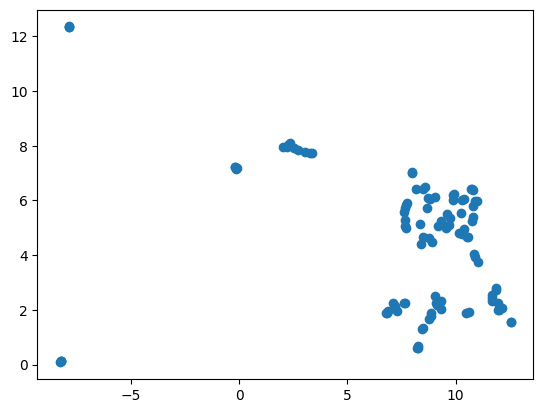

In [22]:
umap_model = umap.UMAP(
    n_neighbors=3,
    min_dist= 0.04,
    random_state= 75,
    n_components=2,
    n_jobs=-1)

umap_transform = umap_model.fit_transform(df_baraya_scaled)
umap_1 = umap_transform[:,0]
umap_2 = umap_transform[:,1]
plt.scatter(umap_1, umap_2)

plt.show()


# K-means

In [23]:
from sklearn.cluster import KMeans #importacion de kmeans

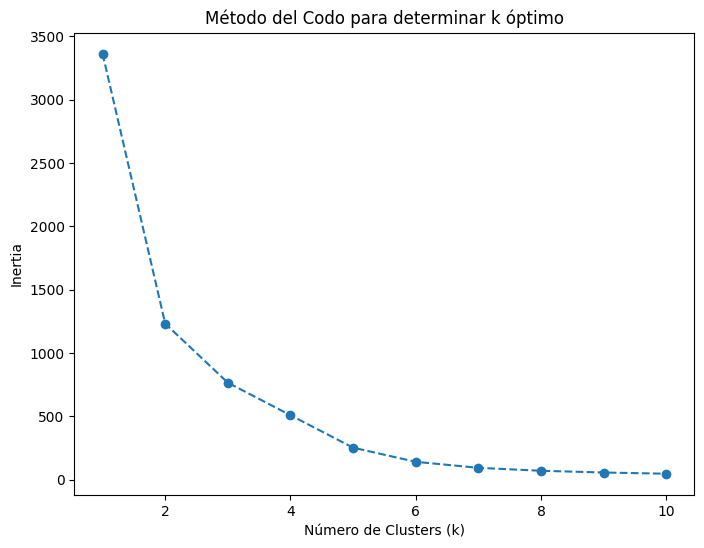

In [24]:
# encontrar k
#metodo del elbow
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Probar diferentes valores de k
inertia = []
k_values = range(1, 11)  # Probar de 1 a 10 clusters

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=2, n_init=10)
    kmeans.fit(umap_transform)
    inertia.append(kmeans.inertia_)  # Guardar la inercia

# Graficar el método del codo
plt.figure(figsize=(8,6))
plt.plot(k_values, inertia, marker='o', linestyle='--')
plt.xlabel("Número de Clusters (k)")
plt.ylabel("Inertia")
plt.title("Método del Codo para determinar k óptimo")
plt.show()


# Iteraciónes con diferentes parametro de K-means

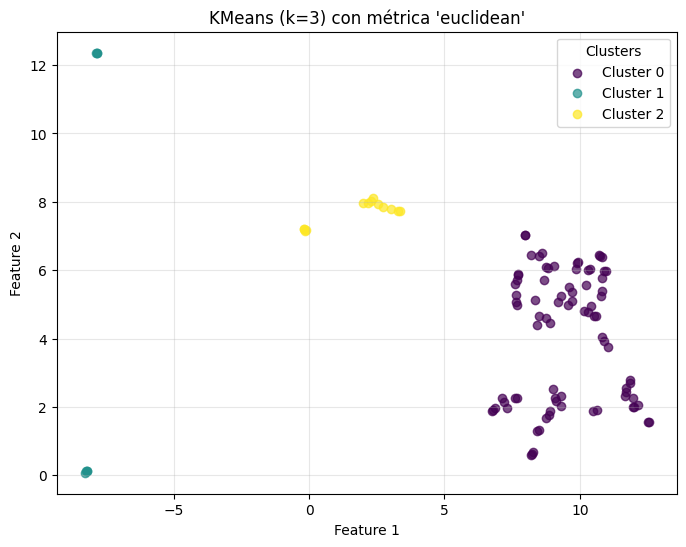

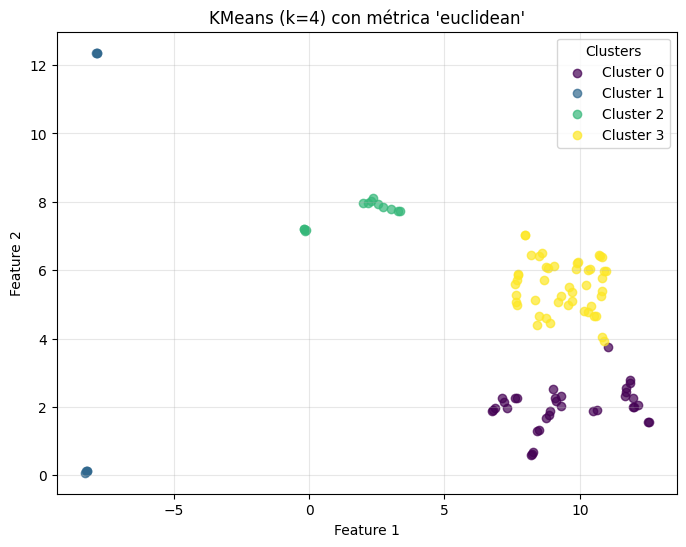

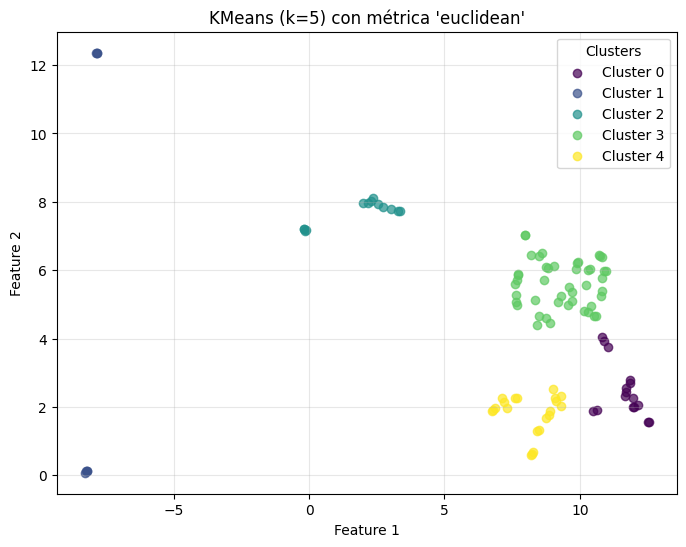

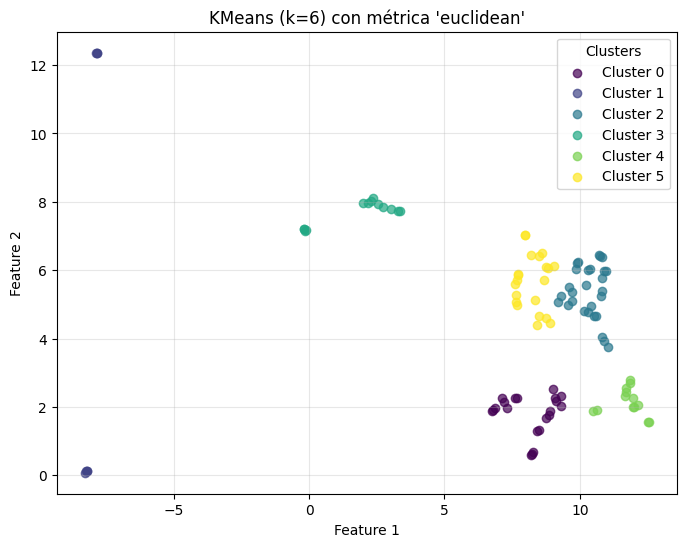

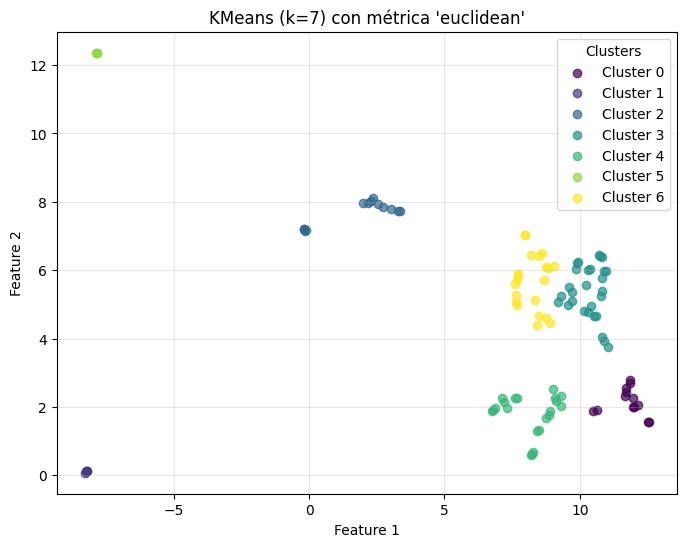

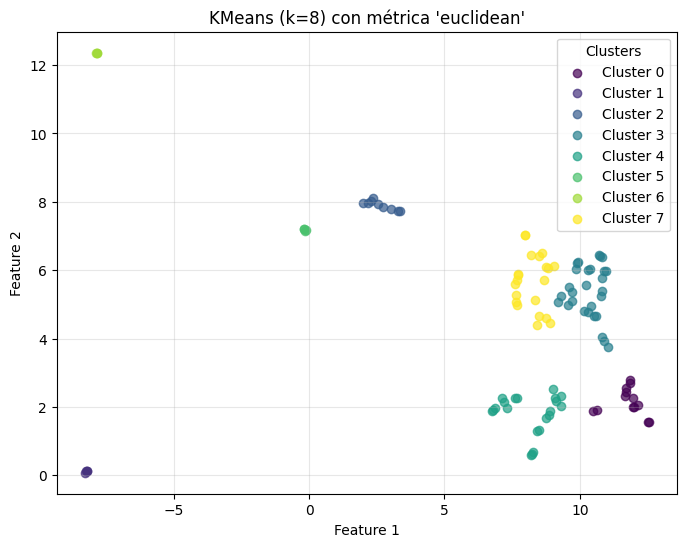

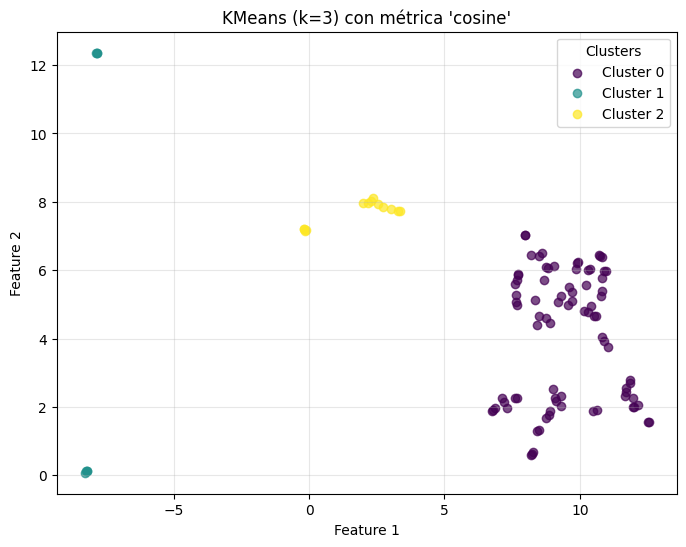

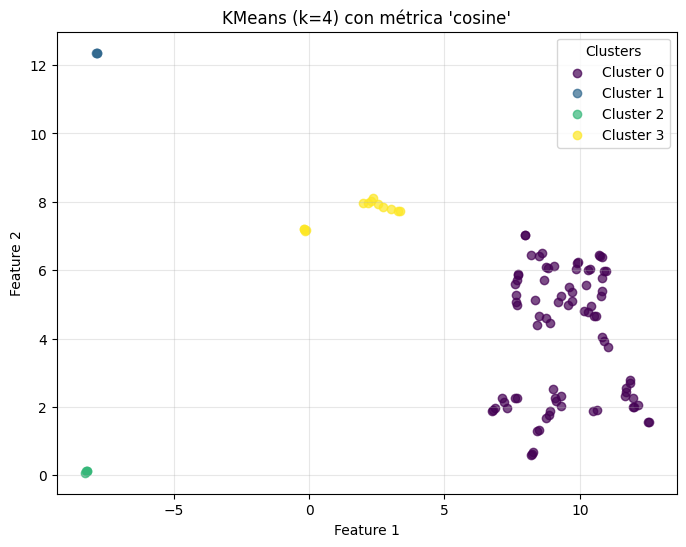

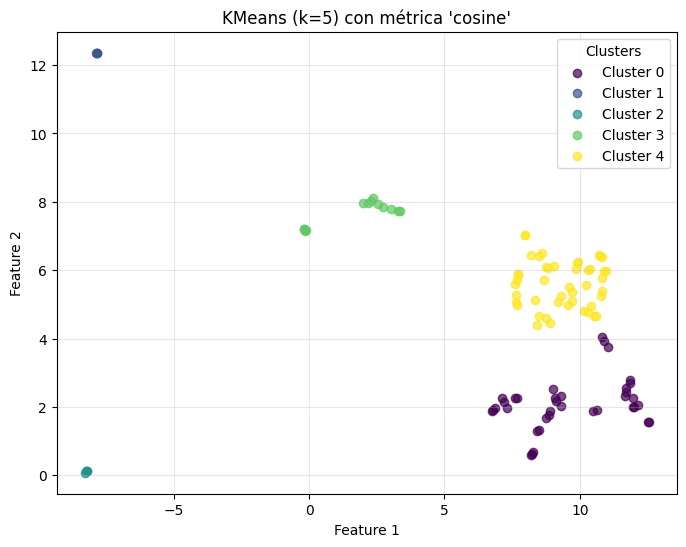

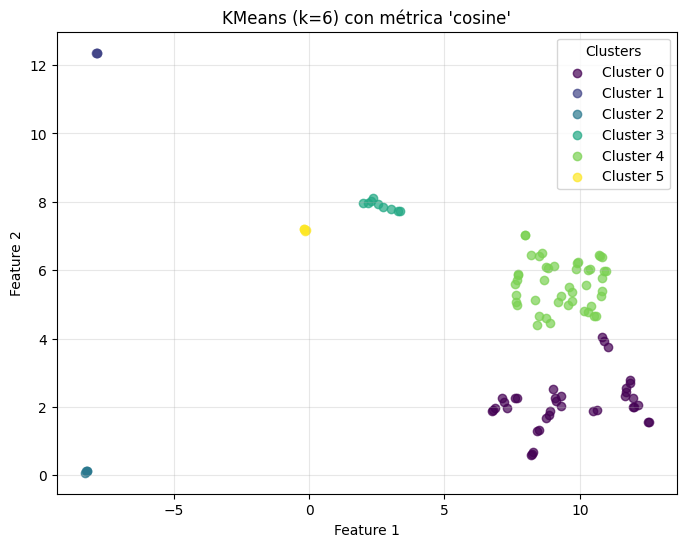

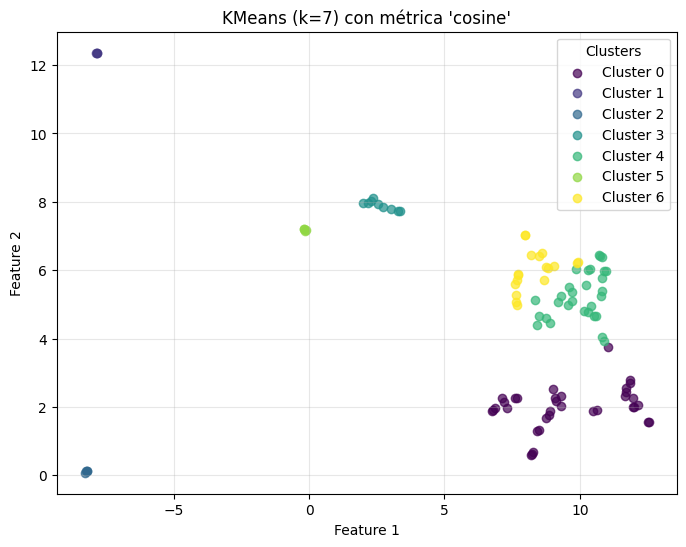

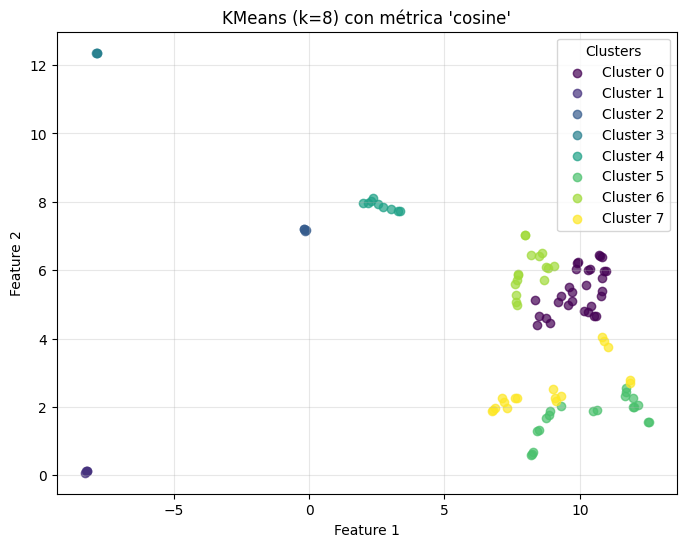

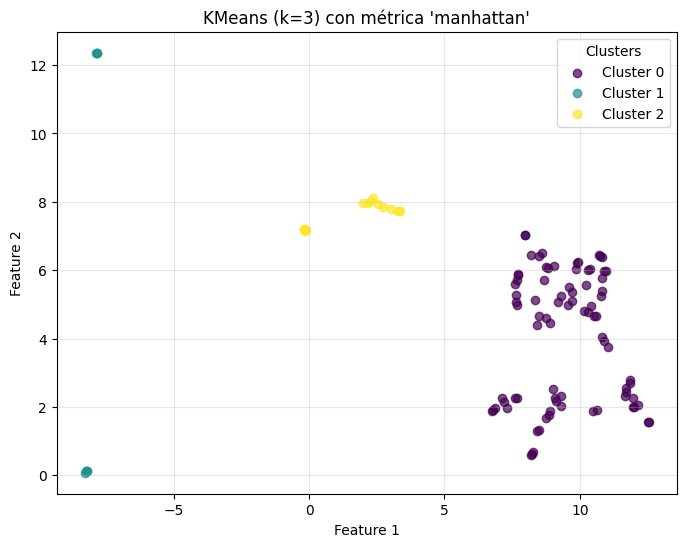

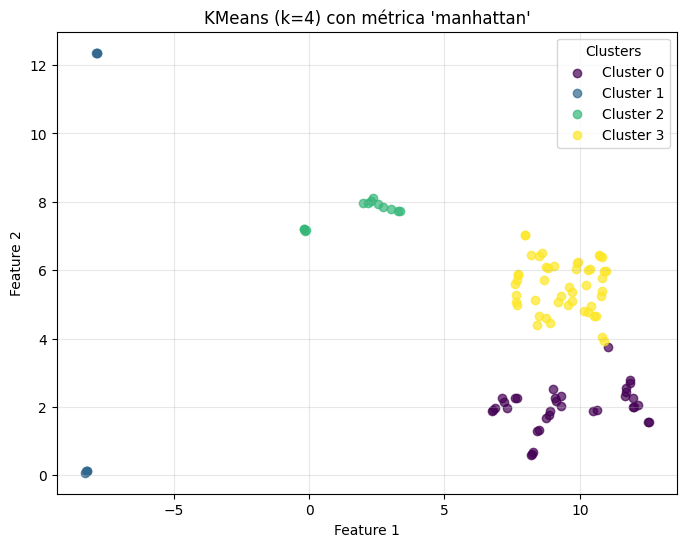

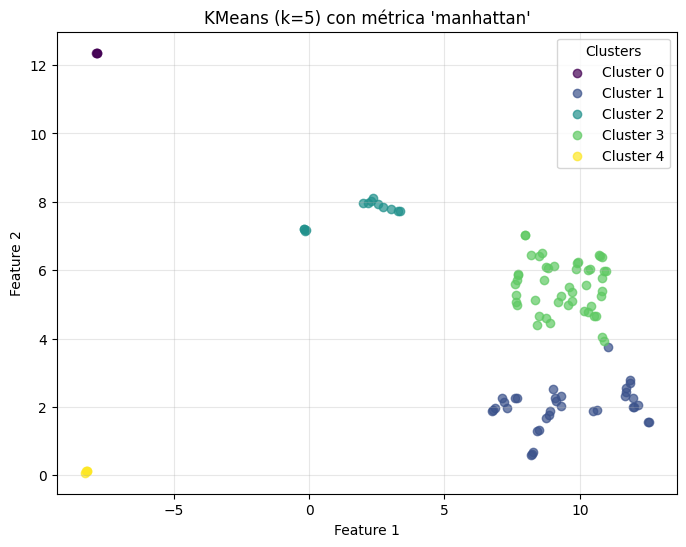

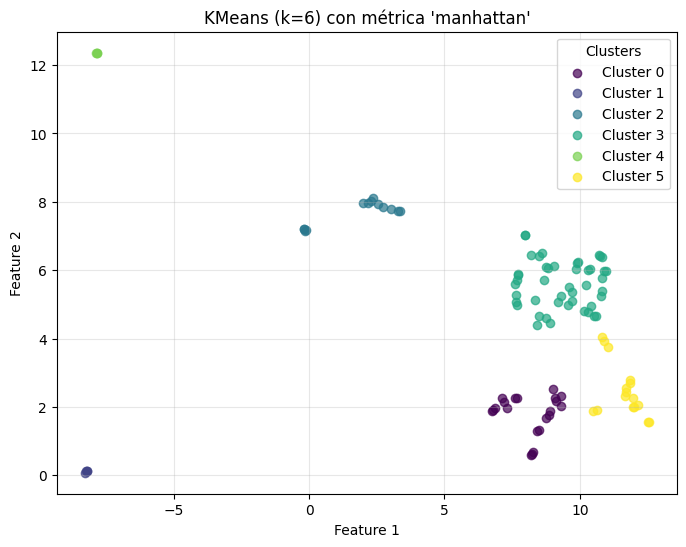

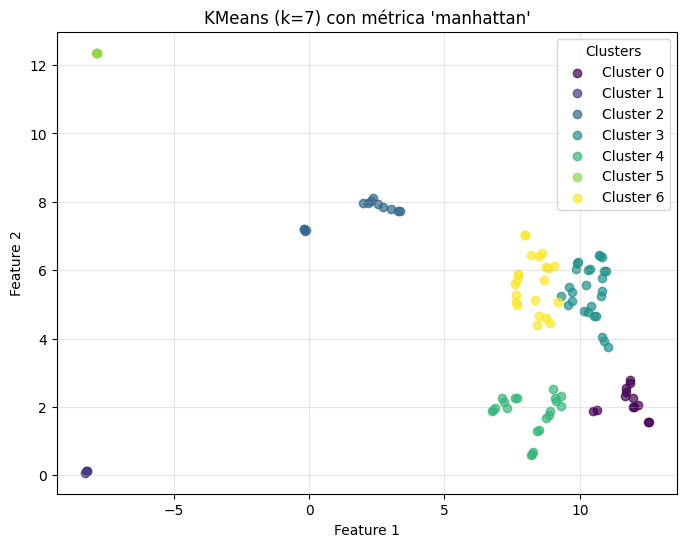

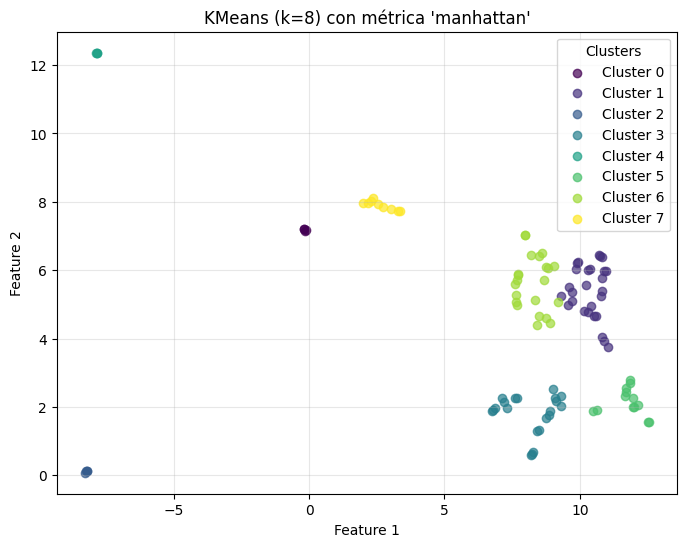

In [25]:
from sklearn.metrics import pairwise_distances
k_values = [3, 4, 5, 6, 7, 8]
metrics = ['euclidean', 'cosine', 'manhattan']

for metric in metrics:
    distance_matrix = pairwise_distances(umap_transform, metric=metric)

    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=2, n_init=10)
        clusters = kmeans.fit_predict(distance_matrix)

        unique_clusters = np.unique(clusters)
        colors = plt.cm.viridis(np.linspace(0, 1, len(unique_clusters)))

        plt.figure(figsize=(8, 6))
        for cluster, color in zip(unique_clusters, colors):
            plt.scatter(umap_transform[clusters == cluster, 0], umap_transform[clusters == cluster, 1],
                        color=color, label=f'Cluster {cluster}', alpha=0.7)

        plt.xlabel("Feature 1")
        plt.ylabel("Feature 2")
        plt.title(f"KMeans (k={k}) con métrica '{metric}'")
        plt.legend(title="Clusters")
        plt.grid(alpha=0.3)
        plt.show()

# Mejor comportamiento

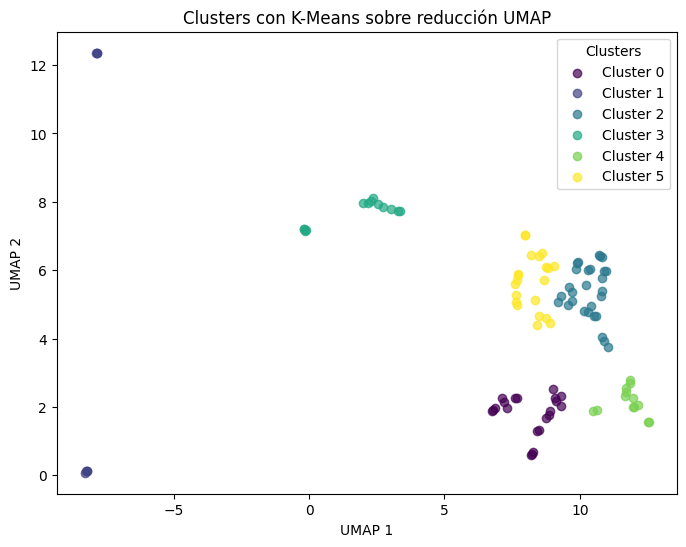

In [26]:
from sklearn.metrics import pairwise_distances
kmeans = KMeans(n_clusters=6, random_state=2, n_init=10)
distance_matrix = pairwise_distances(umap_transform, metric= 'euclidean')
clusters = kmeans.fit_predict(distance_matrix)


unique_clusters = np.unique(clusters)
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_clusters)))


plt.figure(figsize=(8, 6))
for cluster, color in zip(unique_clusters, colors):
    plt.scatter(umap_1[clusters == cluster], umap_2[clusters == cluster],
                color=color, label=f'Cluster {cluster}', alpha=0.7)

plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.title("Clusters con K-Means sobre reducción UMAP")
plt.legend(title="Clusters")
plt.show()
